In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [8]:
filename = 'data/1613245872__wisconsinBreastCancer.csv'
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Text(0.5, 0, 'concave points_worst')

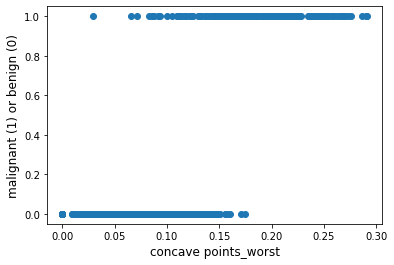

In [9]:
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [10]:
X = df[['concave points_worst']]
y = df['diagnosis']

Text(0.5, 0, 'concave points_worst')

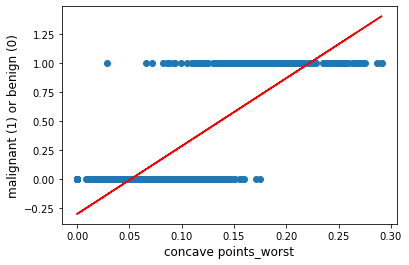

In [11]:
# Hacer una instancia de regresión lineal
lr = LinearRegression()
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# El modelo está aprendiendo la relación entre X e y
lr.fit(X,y)
# Obtener predicciones para valores x originales
# No es así como lo haremos durante el resto del curso
predictions = lr.predict(X)
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.plot(df['concave points_worst'], predictions, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [12]:
# Crea una instancia del modelo
logreg = LogisticRegression(C = 1000)
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Escalar la regresión logística
scaler = StandardScaler()
# Se ajusta solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar la transformación tanto al conjunto de entrenamiento como al conjunto de prueba.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# El modelo está aprendiendo la relación entre X e y
logreg.fit(X_train,y_train)

LogisticRegression(C=1000)

In [13]:
# Este código es solo para trazar/visualizar las predicciones
example_df = pd.DataFrame(data = {'worst_concave_points': X_test.flatten(),
                     'diagnosis': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

Text(0.5, 0, 'concave points_worst')

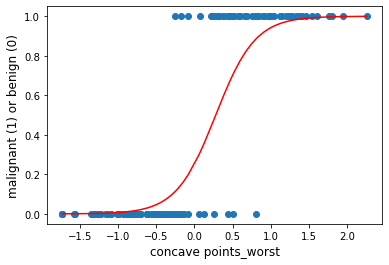

In [14]:
plt.scatter(example_df['worst_concave_points'], example_df['diagnosis'])
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)